# Car Price Prediction with Machine Learning

# Import necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Load the dataset

In [2]:
df=pd.read_csv("C:/Users/ELCOT/Downloads/data_prac/car data.csv")

In [3]:
df.shape

(301, 9)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Driven_kms     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Selling_type   301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [10]:
df.describe()

,Year,Selling_Price,Present_Price,Driven_kms,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.642584,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [12]:
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Driven_kms       0
Fuel_Type        0
Selling_type     0
Transmission     0
Owner            0
dtype: int64

In [13]:
df.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Driven_kms',
       'Fuel_Type', 'Selling_type', 'Transmission', 'Owner'],
      dtype='object')

# EDA

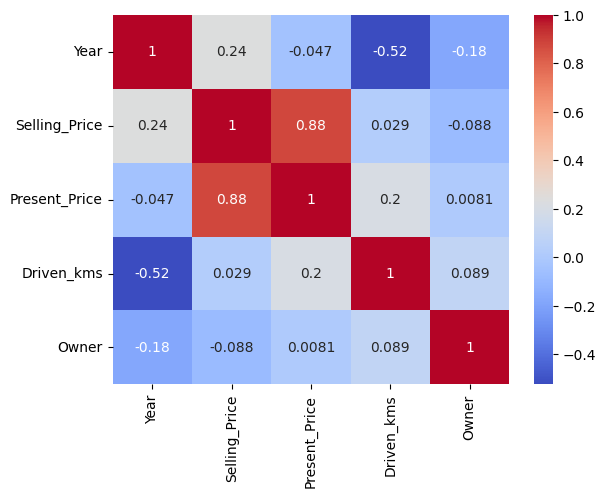

In [15]:
numeric_df = df.select_dtypes(include=['float64', 'int64']) 
corr_matrix = numeric_df.corr() 
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()


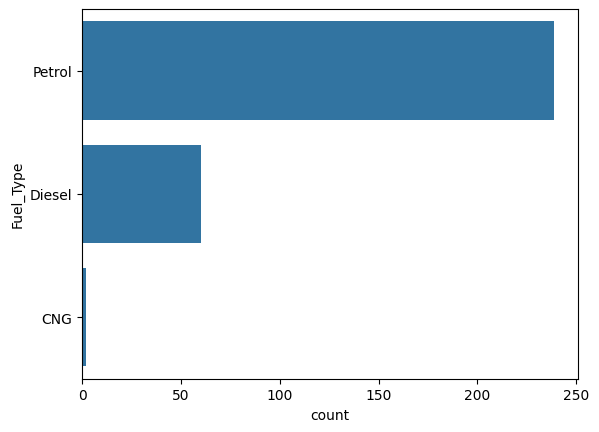

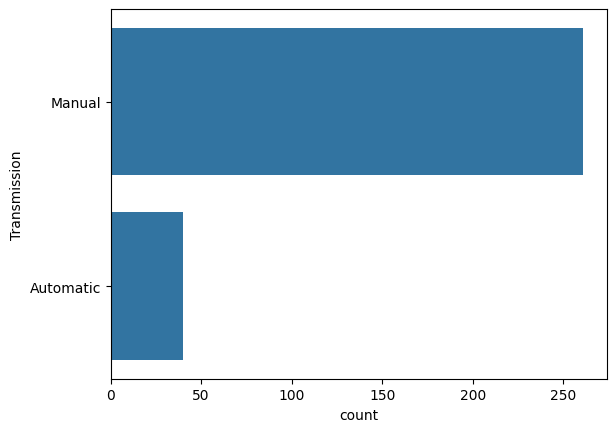

In [16]:
sns.countplot(df['Fuel_Type'])
plt.show()
sns.countplot(df['Transmission'])
plt.show()


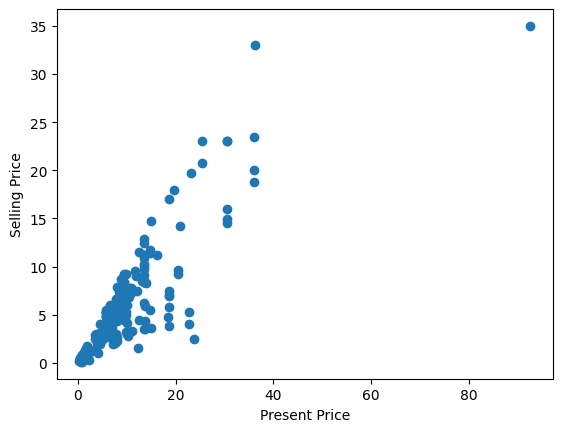

In [18]:
plt.scatter(df['Present_Price'], df['Selling_Price'])
plt.xlabel('Present Price')
plt.ylabel('Selling Price')
plt.show()


# Data Preprocessing

In [4]:
df['Car_Age'] = 2025 - df['Year']
df.drop('Year', axis=1, inplace=True)


In [5]:
df.drop('Car_Name', axis=1, inplace=True)

In [6]:
df = pd.get_dummies(df, columns=['Fuel_Type', 'Selling_type', 'Transmission'], drop_first=True)


In [7]:
df.head()

,Selling_Price,Present_Price,Driven_kms,Owner,Car_Age,Fuel_Type_Diesel,Fuel_Type_Petrol,Selling_type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,11,False,True,False,True
1,4.75,9.54,43000,0,12,True,False,False,True
2,7.25,9.85,6900,0,8,False,True,False,True
3,2.85,4.15,5200,0,14,False,True,False,True
4,4.60,6.87,42450,0,11,True,False,False,True


In [8]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_columns = ['Car_Age', 'Present_Price', 'Driven_kms', 'Owner']

df[scaled_columns] = scaler.fit_transform(df[scaled_columns])


# Define X (independent variables) and y (target variable)

In [9]:

X = df.drop('Selling_Price', axis=1) 
y = df['Selling_Price']             



# Split data

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training data: {X_train.shape}, Testing data: {X_test.shape}")


Training data: (240, 8), Testing data: (61, 8)


Model Selection

In [11]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)



LinearRegression()

In [12]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

y_pred = model.predict(X_test)
print("MAE:", mean_absolute_error(y_test, y_pred))
print("R2 Score:", r2_score(y_test, y_pred))


MAE: 1.2163740193330421
R2 Score: 0.8488707839193137


In [13]:
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)


RandomForestRegressor()

In [14]:
y_pred = rf_model.predict(X_test)
print("MAE:", mean_absolute_error(y_test, y_pred))
print("R2 Score:", r2_score(y_test, y_pred))

MAE: 0.6104803278688528
R2 Score: 0.9610859619031163


From the results of R2 SCORE. Random Forest Regressor gives the better result.

# Predicting the new sample

In [15]:
car_age = float(input("Enter car age in years: "))
present_price = float(input("Enter present price in lakhs: "))
driven_kms = int(input("Enter number of kilometers driven: "))
owner = int(input("Enter the number of previous owners: "))
fuel_type = input("Enter fuel type (Diesel/Petrol): ").lower() 
selling_type = input("Enter selling type (Individual/Dealer): ").lower() 
transmission = input("Enter transmission type (Manual/Automatic): ").lower()  

new_sample = {
    'Present_Price': present_price,
    'Driven_kms': driven_kms,
    'Owner': owner,
    'Car_Age': car_age,
    'Fuel_Type_Diesel': 1 if fuel_type == 'diesel' else 0,   
    'Fuel_Type_Petrol': 1 if fuel_type == 'petrol' else 0,  
    'Selling_type_Individual': 1 if selling_type == 'individual' else 0, 
    'Transmission_Manual': 1 if transmission == 'manual' else 0 
}

In [16]:
sample_df = pd.DataFrame([new_sample])

sample_df[scaled_columns] = scaler.transform(sample_df[scaled_columns])

print(sample_df)


   Present_Price  Driven_kms     Owner   Car_Age  Fuel_Type_Diesel  \
0      -0.536434   -0.178949 -0.174501 -2.207361                 1   

   Fuel_Type_Petrol  Selling_type_Individual  Transmission_Manual  
0                 0                        0                    1  


In [17]:
predicted_price = rf_model.predict(sample_df)

print(f"Predicted Selling Price: {predicted_price[0]:.2f} lakhs")


Predicted Selling Price: 1.57 lakhs
